In [40]:
from brian2 import *

%matplotlib inline

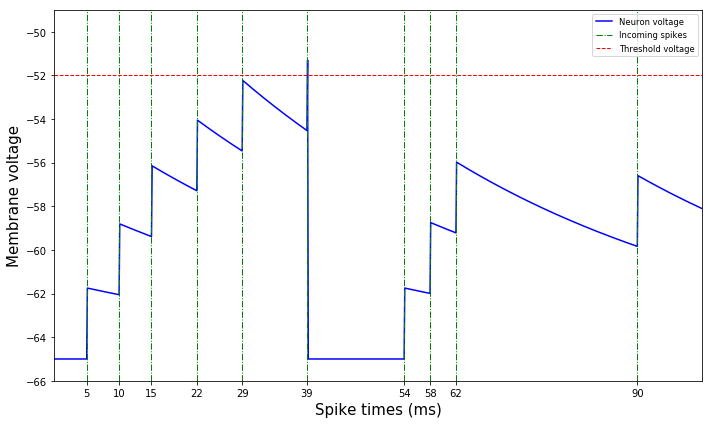

In [56]:
start_scope()

eqs = '''
dv/dt = (-65.0 - v) / tau : 1
I : 1
tau : second
'''

spike_times = [ 5, 10, 15, 22, 29, 39, 54, 58, 62, 90 ]

F = SpikeGeneratorGroup(1, [0] * len(spike_times), array(spike_times) * ms)
G = NeuronGroup(1, eqs, threshold='v > -52.0', reset='v = -65.0', method='linear')
G.v = -65.0
S = Synapses(F, G, on_pre='v_post += 3.25')
S.connect(j='i')
G.tau = 50 * ms

M = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(F)

run(100 * ms)

figure(figsize=(10, 6))

plot(M.t / ms, M.v[0], '-b', label='Neuron voltage')
for idx, spike_time in enumerate(spikemon.t):
    if idx == 0:
        axvline(spike_time / ms, ls='-.', c='g', lw=1, label='Incoming spikes')
    else:
        axvline(spike_time / ms, ls='-.', c='g', lw=1)
        
axhline(-52.0, ls='--', c='r', lw=1, label='Threshold voltage')
xlabel('Spike times (ms)', fontsize=15)
ylabel('Membrane voltage', fontsize=15)
xlim([0, 100])
ylim([-66, -49])
xticks(spike_times)
yticks(range(-66, -48, 2))
tight_layout()
legend(loc='best', fontsize='small');
savefig('../../plots/state_monitor.png')